# Slicing

This notebook will go over a guide to how slicing works in prysm.  We begin by importing some classes which can be sliced, as well as matplotlib.  Note that while we use specific prysm clases as examples, virtually every class in prysm can be sliced in the same way.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np

from prysm import (
    config,
    sample_files,
    Interferogram)

from matplotlib import pyplot as plt
plt.style.use('bmh')

plt.rcParams.update({'axes.grid': False, 'mathtext.fontset': 'dejavusans'})
%matplotlib inline

Now we prepare a few prysm objects for slicing.  This code is not relevant to the action of slicing and can be ignored for the purposes of this tutorial.  The object is visualised with `.plot2d()` to give an idea of the data we're looking at.

Interferogram with:
Units: <prysm.conf.Units object at 0x1c227510b8>
Size: (50.000x50.825), , (425x432) px
Height: 330.700 PV, 44.591 RMS [nm]


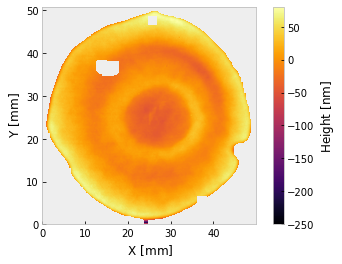

In [2]:
i = Interferogram.from_zygo_dat(sample_files('dat')).crop()

print(i)
i.plot2d();
i.recenter()
i.fill()

Slices are accessed by calling the `.slices()` method on a prysm object, which returns a `Slices` object.  For a full reference on the `Slices` class, please look at the [API documentation](../api/base_classes.html#prysm._richdata.Slices).

`.slices` takes only a single parameter, `twosided`.  With the default of `None`, an intelligent default is chosen by prysm.  This can be accessed (or changed) with `(class)._default_twosided`.  Alternatively, just change it in the call to `.slices()` on a case-by-case basis.  Here, we will not do so.

In [3]:
print('interferograms default to two-sided slices?', Interferogram._default_twosided)

# make a slices object
s = i.slices()

interferograms default to two-sided slices? True


There are several slices supported, from simple Cartesian ones (`.x` and `.y` for slices along the x and y Cartesian axes, resp.) to more complex azimuthal routines, (`.azavg`, `.azmedian`, `.azmin`, `.azmax`, `.azpv`,  `.azvar`, `.azstd`).  Each of these returns a tuple of (coordinate, value).  We will use only the `.x` slice for example at the moment:

In [4]:
u, v = s.x
u[:5], v[:5]

(array([-24.99993096, -24.88200676, -24.76408255, -24.64615835,
        -24.52823415]),
 array([   0.        ,    0.        ,  -76.5122536 , -151.06438763,
        -180.84275589]))

Any of the slices can be plotted with the `.plot` method.  It takes either a single slice, or sequence of slices:

x
x
y
azavg


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c2384f7f0>)

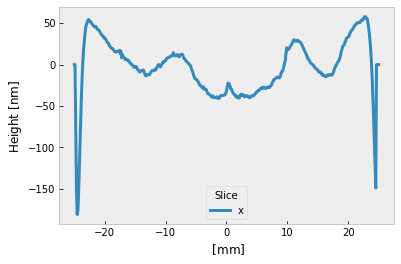

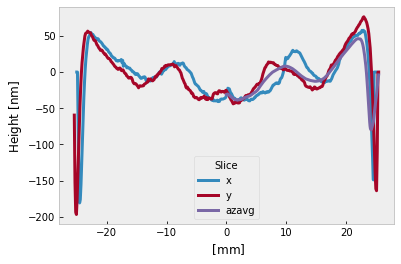

In [5]:
s.plot('x')

s.plot(['x', 'y', 'azavg'])

since `.slices` returns the slices object, it can just be chained:

azpv


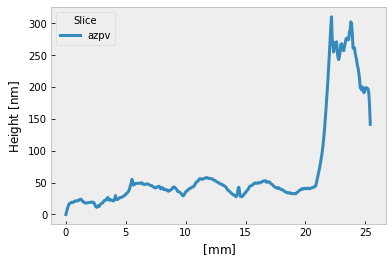

In [6]:
i.slices().plot('azpv')

# here we just get a better example for more plot options
# this can be ignored
psd = i.psd()

You will rarely want to keep a `Slices` object around, but do note that the azimuthal slice types require computation and are not just views into an array.  The radial coordinate transformation is cached on the slice instance, so if you need to perform multiple calls (to get a slice itself, and plot later for example) it can be beneficial to get a slice instance and then reuse it.

`Slices.plot` has more parameters for customization, for example logarithmic scaling:

azavg
azavg


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c23818240>)

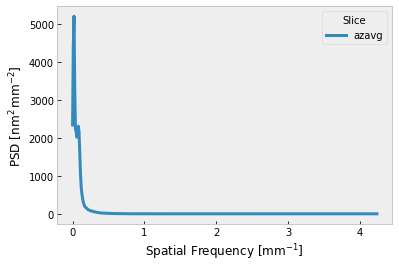

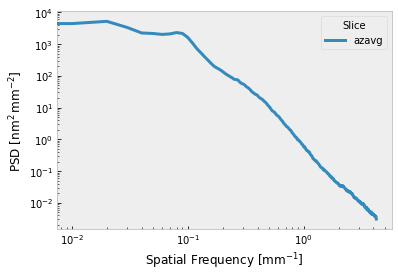

In [7]:
# this is going to look pretty blank
psd.slices().plot('azavg', xscale='linear', yscale='linear')

# this is going to look a lot better
psd.slices().plot('azavg')

Classes adjust the default to this with their `._slice_xscale` and `._slice_yscale` fields.  All of the built-in prysm classes have sane defaults chosen for you.  The x axis can also be inverted (i.e., between period and frequency), and x and y limits adjusted:

azavg


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c24188e10>)

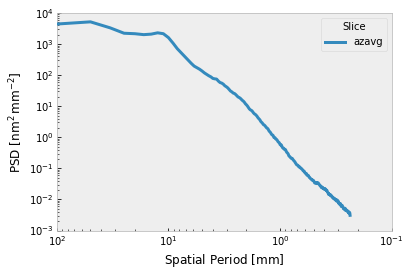

In [8]:
psd.slices().plot('azavg', invert_x=True, xlim=(100, 0.1), ylim=(1e-3,1e4))

The line width, alpha (transparency), and zorder can be adjusted, and the axis labels or legend turned off:

x


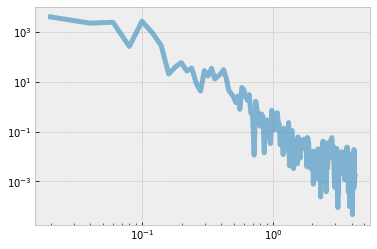

In [9]:
# with zorder=3, you can see we end up above the grid
psd.slices().plot('x', lw=5, alpha=.6, zorder=3, show_axlabels=False, show_legend=False)
plt.grid(True)

linewidth, alpha, and zorder can be sequences in the same order as the slices, and a figure and axis can be passed in:

x
y
azavg


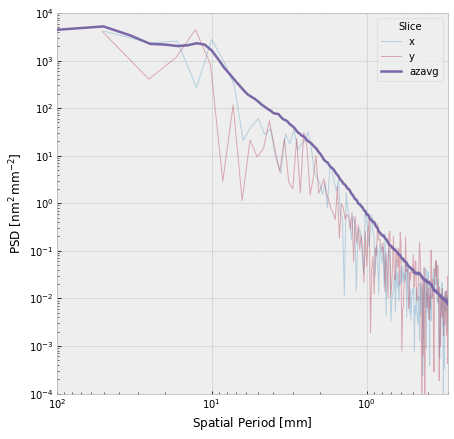

In [10]:
# you could be fancier here
fig, ax = plt.subplots(figsize=(7,7))

slices = ('x', 'y', 'azavg')
lw = (1, 1, 2.5)
alpha = (0.3, 0.3, 1)
zorder = (3, 3, 4)

slices_ = i.psd().slices()
i.psd().slices().plot(slices, lw=lw, alpha=alpha, zorder=zorder,
                      invert_x=True, xlim=(100, 0.3), ylim=(1e-4, 1e4),
                      fig=fig, ax=ax)
plt.grid(True)

Last but not least, values are exact coordinates can be extracted through interpolation:

In [11]:
# these work for either single values or arrays
i.exact_x(10), i.exact_y(10), i.exact_x([0, 5, 10])

(array(18.26232604),
 array(3.28560914),
 array([-32.16334133, -32.66535048,  18.26232604]))

In the multi-dimensional indexing scheme:

- no value can be used for one of the two coordinates for an implicit 0
- a single value can be used, and it will be duplicated to be the same for the entire slice

In [12]:
# no value given for y => y=0
print(i.exact_xy(15))

# can use a sequence for one axis and not the other
print(i.exact_polar([0, 10, 20], 10))

-6.5347355233203945
[-31.33777373   7.68547364  35.52071367]
